# Model validation water levels

Note: this notebook requires the model output data

In [1]:
import mikeio
import modelskill
import matplotlib.pyplot as plt 
import pandas as pd
import helper as h

Instead of reading the entire dfsu (area.dfsu file), we can simply load the outputted points (dfs0) since they correspond to the locations we have observations from.

In [2]:
root = "../"            # Change the root if needed
fldr = f"{root}output/" # Change the folder if needed
data_dir = f"{fldr}points.dfs0"
dfsu_dir = f"{fldr}area.dfsu"

In [3]:
# Load dfsu to get geometry for plotting
area = mikeio.open(dfsu_dir)
geom = area.geometry

In [4]:
# Data is stored as a dfs0 file. We can use mikeio to open the file and look at the content. 
# For more info on mikeio, see https://dhi.github.io/mikeio

# Load data
# The data includes a spin-up period, so we will skip the first 10 days of data
ds = mikeio.read(data_dir, time = slice("2014-01-10", "2023-12-31"))
ds

<mikeio.Dataset>
dims: (time:174863)
time: 2014-01-10 00:00:00 - 2023-12-31 23:00:00 (174863 records)
geometry: GeometryUndefined()
number of items: 39

## Compare to observations of water levels

The modelskill package can be used to compare model results with observations.
For more info on modelskill, see [https://github.com/DHI/modelskill](https://github.com/DHI/modelskill)

In [5]:
df_stn = pd.read_csv(root + "observations/stations.csv", index_col=0)
df_stn

,Longitude,Latitude,Longitude_original,Latitude_original
Station,,,,
Drogden,12.7117,55.5358,NaN,NaN
Klagshamn,12.8920,55.5260,12.8936,55.5222
Barseback,12.9033,55.7564,NaN,NaN
Dragor,12.6833,55.6000,NaN,NaN
Flinten7,12.8445,55.5894,NaN,NaN
Helsingborg,12.6845,56.0412,NaN,NaN
Hornbaek,12.4660,56.0970,12.4667,56.1000
Kobenhavn,12.6500,55.7000,12.6000,55.7000
Koege,12.2000,55.4500,NaN,NaN


In [ ]:
# Create list of modelskill.PointObservation objects
wllist = h.get_wl_point_obs()

In [9]:
i=0
ds[df_stn.index[i]+": Surface elevation"]

<mikeio.DataArray>
name: Drogden: Surface elevation
dims: (time:174863)
time: 2014-01-10 00:00:00 - 2023-12-31 23:00:00 (174863 records)
geometry: GeometryUndefined()
values: [-0.1244, -0.1753, ..., 0.7161]

In [ ]:
# Collect each observation station as point observations in a list
cmps = []
for i in range(len(df_stn)):
    # Define MIKE 21 data as a model result.
    mr = modelskill.PointModelResult(ds[wllist[i].name+": Surface elevation"], name="MIKE 21")

    # # Match the observation and the model result
    cmp = modelskill.match(wllist[i], mr)
    # # Collect comparers
    cmps.append(cmp.remove_bias())

# # Create a comparer collection from the comparers
cc = modelskill.ComparerCollection(cmps)

In [20]:
# Print skill table
print(cc.skill())

                  n          bias      rmse     urmse       mae        cc  \
observation                                                                 
Drogden      170144 -1.002270e-18  0.068652  0.068652  0.053412  0.940073   
Klagshamn     87400 -2.064964e-17  0.064780  0.064780  0.050203  0.944285   
Barseback     87333 -3.417127e-18  0.070172  0.070172  0.054649  0.915217   
Dragor       172669  2.921690e-18  0.065381  0.065381  0.051056  0.909587   
Flinten7      47916  8.304198e-18  0.072930  0.072930  0.054167  0.870950   
Helsingborg   38092  1.119200e-17  0.074743  0.074743  0.058946  0.919269   
Hornbaek     172239 -6.296285e-18  0.097001  0.097001  0.075469  0.927868   
Kobenhavn    164906 -6.807863e-18  0.078208  0.078208  0.060885  0.897574   
Koege        170568 -5.332153e-18  0.078496  0.078496  0.060108  0.938866   
MalmoHamn     31911 -7.125244e-18  0.066211  0.066211  0.050326  0.915018   
Skanor        87117 -9.787427e-19  0.074999  0.074999  0.058183  0.949016   

We can see from the skill table that the model has an RMSE of 6.5-9.7 cm. This is good.

<Axes: title={'center': 'Drogden'}, xlabel='time', ylabel='Surface Elevation [meter]'>

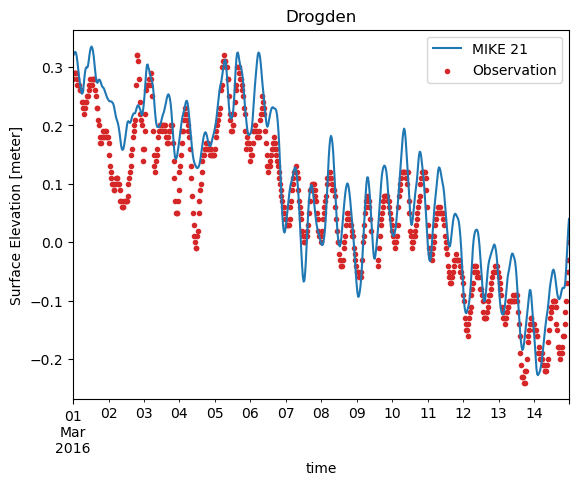

In [21]:
# Look at a timeseries for a qualitative comparison between observations and model
cc["Drogden"].sel(time=slice("2016-03-01","2016-03-14")).plot.timeseries()

In [27]:
# Make scatter plots
# These plots also include the skill table. Plots are saved but not shown, since this is too tedious.. 
# (code takes ~7 mins to run)
for i,cmp in enumerate(cc):
    plt.figure();
    # Choose the last year of data for the scatter plot
    cmp.sel(model="MIKE 21",time=cmp.time[-17520:]).plot(skill_table=True,figsize=(6,5));
    plt.savefig(f"{root}figures/modelskill_comparison_{cmp.name}.png", bbox_inches='tight');
    plt.close();

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

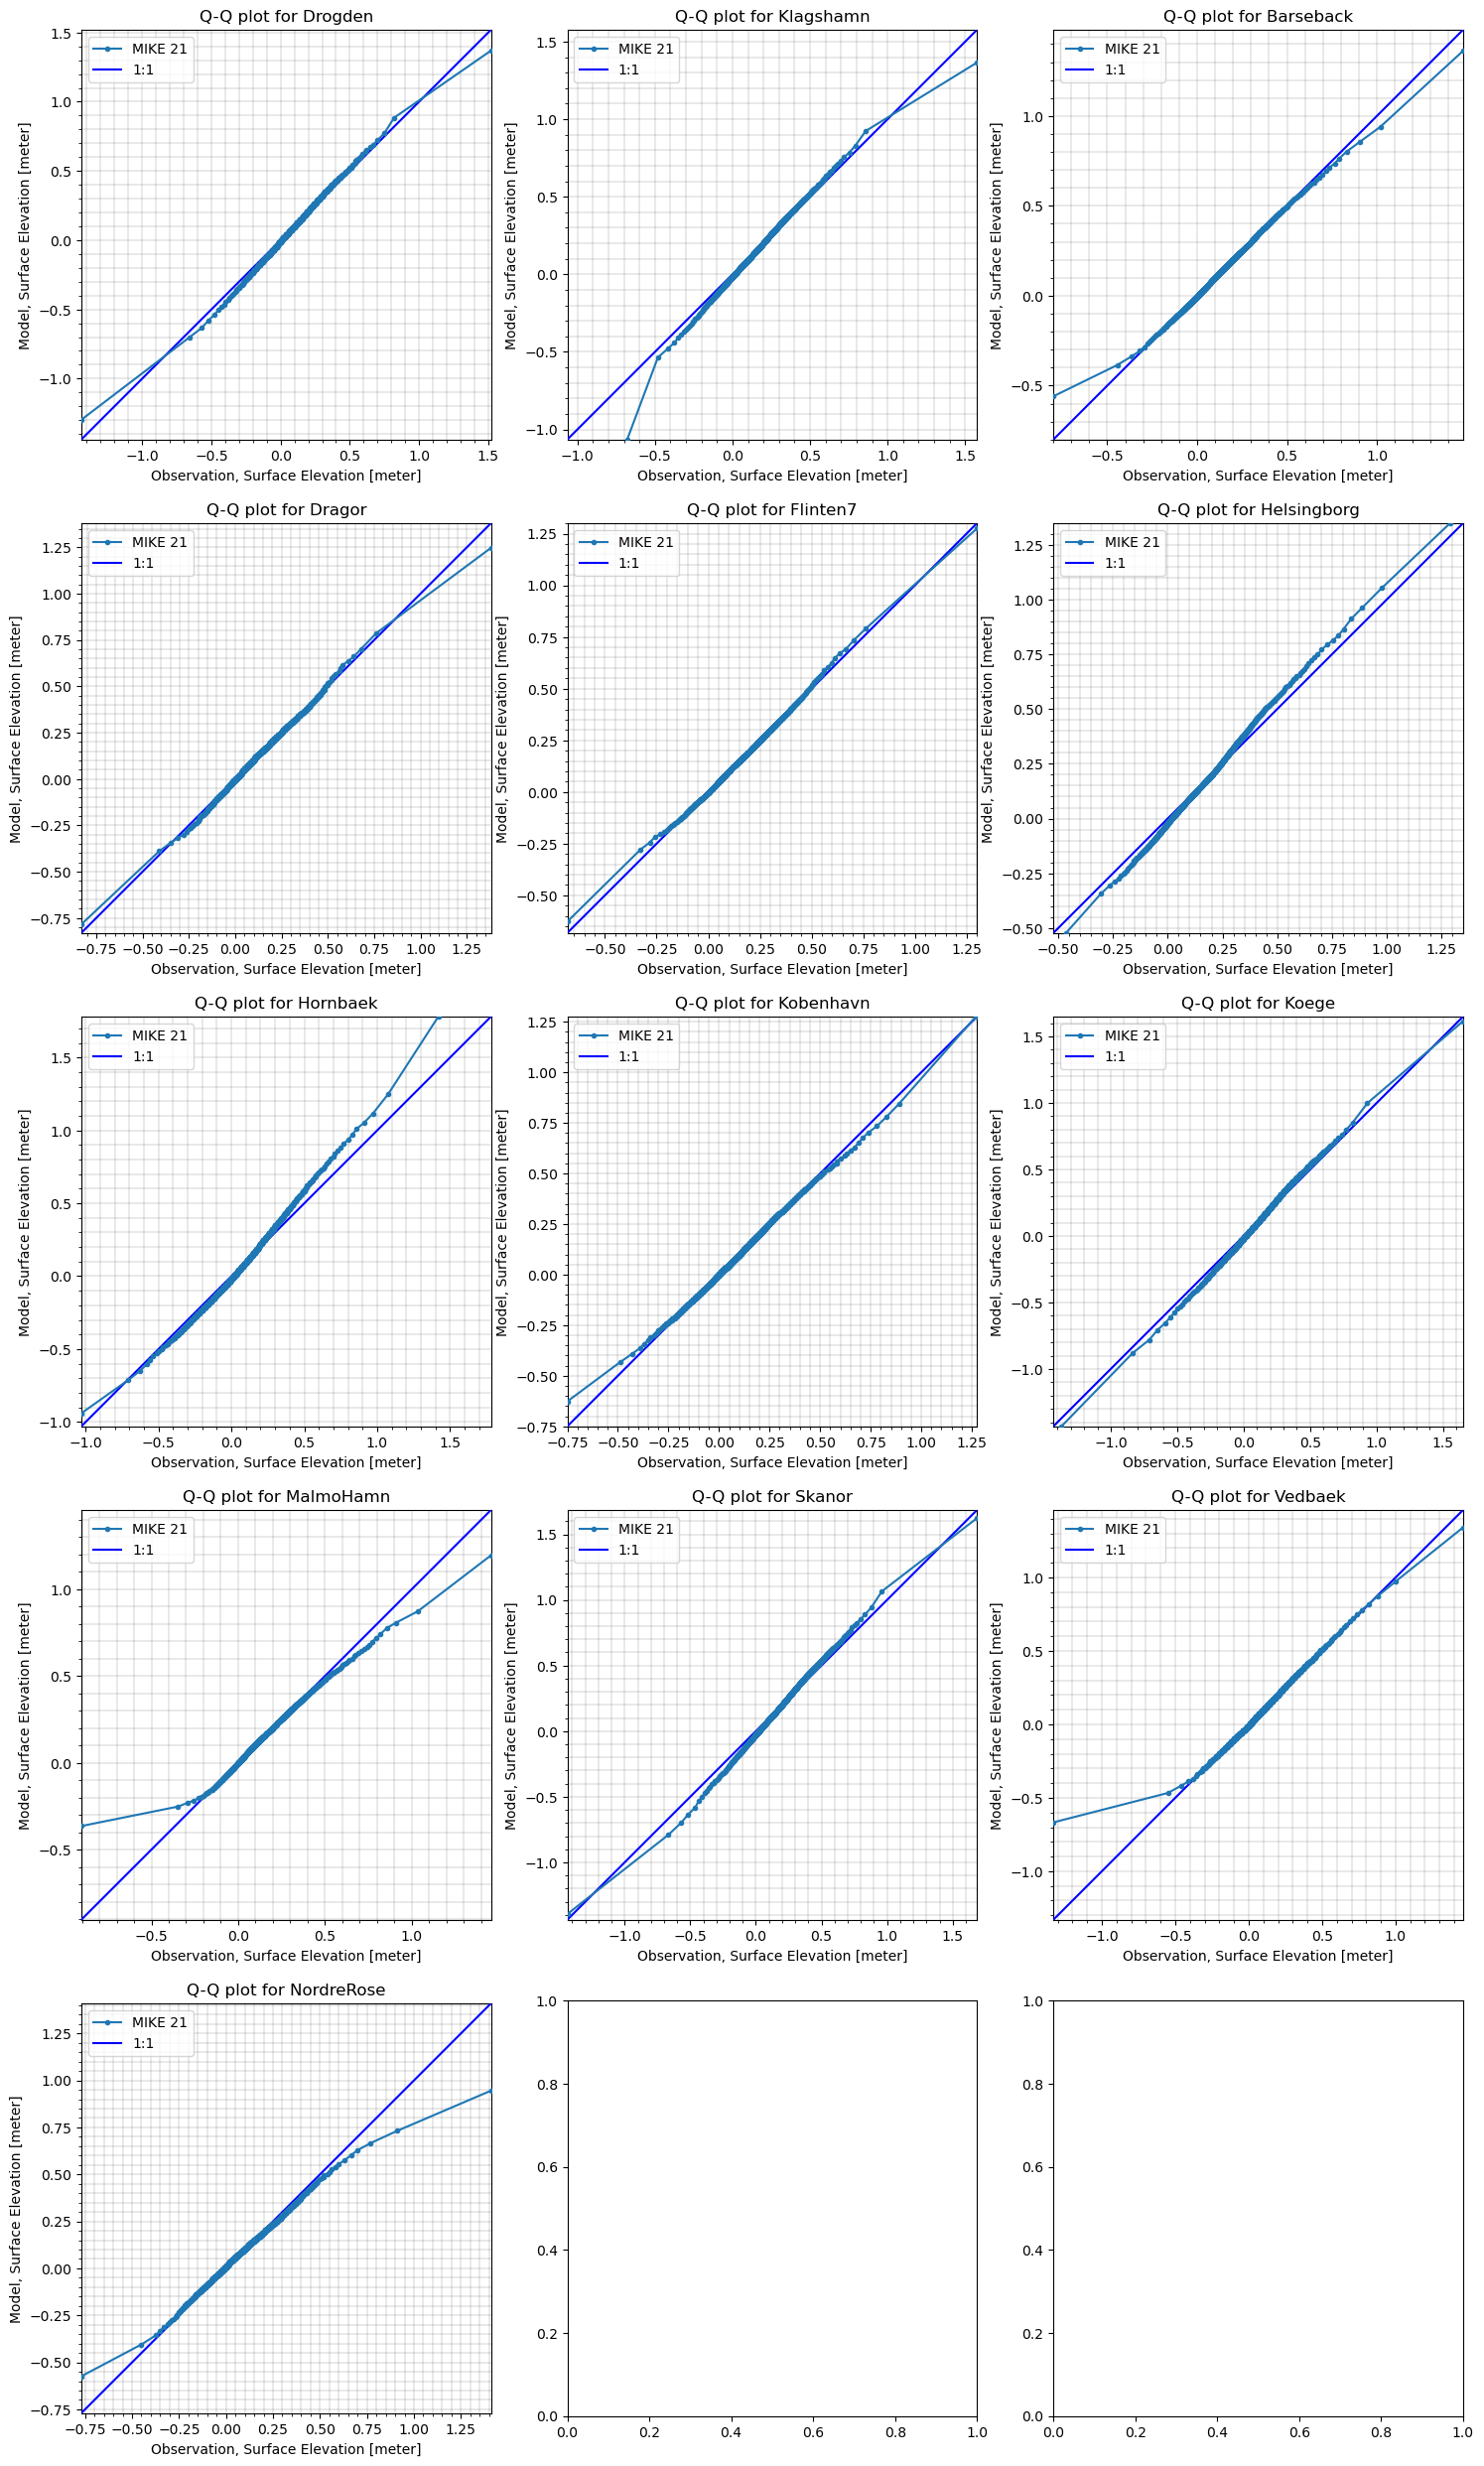

In [28]:
# Make qq plots
# Determine the number of rows and columns for subplots
num_comparers = len(cc)
num_cols = 3  # Reasonable number of columns
num_rows = (num_comparers + num_cols - 1) // num_cols  # Calculate rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axs array for easy iteration if it's 2D
if num_rows > 1:
    axs = axs.flatten()
for i,cmp in enumerate(cc):
    cmp.plot.qq(ax = axs[i])
plt.tight_layout()
plt.savefig(f"{root}figures/modelskill_comparison_qq.png", bbox_inches='tight')
plt.show()